# Lending Club Case Study

# Notes

- Remove rows with current loan status
- loan_amnt, funded_amnt, funded_amnt_inv
- Consider only loan_amnt - because need to decide before approval
- Data Understanding
- Data cleaning
- Data Analysis
- Recommendations 
- Data Cleaning
- Check the percentage of missing values
- Drop columns with high percentage of missing values
- Perform imputations for less missing percentage values columns (Identify correct metric)
- Median for outliers and mean for no outliers and mode for categorical data
- Drop rows where the missing percentage is quite high

- Drop columns having single value as data as it has no influence on the decision

- For interest rate values are like 6.5%, do data cleaning and convert it into float data
- For Employment length create your own rule and mention the assumptions (required float datatype)

- Don't use variables which shows the behaviour of the applicants during the loan period
- Use only variables that are presented when the applications was made

- Three types of variables
- - related to the applicant (demographic variables such as age, occupation, employment details, etc)
- - Loan characteristics (amount of loan, interest rate, purpose of loan etc)
- - Customer behavior (those which are generated after the loan is approved)

- Customer behavior are not available at the time of loan application, thus they cannot be used as predictors
- Loan status with current to be removed and tag other two as 0 and 1 for easy and clean analysis
- Use cusotmer behavior data for others/past loan of the applicants collected from bureau orgs, drop current loan customer behavior

### Few important variables

- loan amnt
- term
- interest rate
- grade
- subgrade
- annual income
- purpose of loan
- DTI (Debt to income)
- Emp_length
- Loan_Date (Month)
- Home_Ownership
- Verification_status 
- - Income Verified (pay slips, tax returns) 
- - Income source verified (1st party vendors has checked) 
- - Not verified

### Customer behavior variables

- delinq_2yrs
- earlies_cr_line
- inq_last_6mnths
- open_acc
- pub_rec
- revol_bal
- total_acc
- out_prncp
- out_prncp_inv
- total_pymnt
- total_pymnt_inv
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- last_pymnt_d
- last_pymnt_amnt
- last_credit_pull_d
- application_type

- Customer behavior variables are not available at the time of loan application and cannot be used as predictors
- variables such as acc_now_delinq, chargeoff_with_12months etc (which are related to the applicants past loans) are avaiable from the credit bureau

- Skip Description Variable (Need NLP)


### Univariate Analysis
### Bivariate Analysis

## Importing Necessary Libraries

- Pandas for reading, writing and manipulating csv data
- Numpy for numerical calculations
- Matplotlib and Seaborn for visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

## Reading the CSV file

In [2]:
df = pd.read_csv('loan/loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Removing column id and member id as it has no signficance in predicting whether the applicant will default or not

In [3]:
del df['id']
del df['member_id']

In [4]:
print(df.info())
print(df.shape)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 109 entries, loan_amnt to total_il_high_credit_limit
dtypes: float64(74), int64(11), object(24)
memory usage: 33.0+ MB
None
(39717, 109)


,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,104.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Data Cleaning

Finding all the columns having missing values

In [5]:
df.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 109, dtype: int64

Finding columns with missing values with their respective percentage

In [6]:
print("Missing values in terms of Percentage")

for column in df:
    percent = 100 - (df[column].count() / len(df))*100
    if percent > 0:
        print(column + ' has ' + str(percent) + "% missing values")

Missing values in terms of Percentage
emp_title has 6.19130347206486% missing values
emp_length has 2.7066495455346598% missing values
desc has 32.58050708764509% missing values
title has 0.02769594883802995% missing values
mths_since_last_delinq has 64.66248709620567% missing values
mths_since_last_record has 92.98537150338646% missing values
revol_util has 0.12589067653649977% missing values
last_pymnt_d has 0.17876476068182967% missing values
next_pymnt_d has 97.12969257496789% missing values
last_credit_pull_d has 0.005035627061459991% missing values
collections_12_mths_ex_med has 0.14099755772087974% missing values
mths_since_last_major_derog has 100.0% missing values
annual_inc_joint has 100.0% missing values
dti_joint has 100.0% missing values
verification_status_joint has 100.0% missing values
tot_coll_amt has 100.0% missing values
tot_cur_bal has 100.0% missing values
open_acc_6m has 100.0% missing values
open_il_6m has 100.0% missing values
open_il_12m has 100.0% missing valu

Dropping all the columns having more than 50% missing values

In [7]:
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]

print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: mths_since_last_record, next_pymnt_d, mths_since_last_major_derog, annual_inc_joint, dti_joint, verification_status_joint, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, num_tl_30dpd, num_tl_90g_dpd_24m, num_tl_op_past_12m, pct_tl_nvr_dlq, percent_bc_gt_75, tot_hi_cred_lim, total_bal_ex_mort, total_bc_limit, total_il_high_credit_limit, 



In [8]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [9]:
# print(df.isnull().sum())

# print('\n')

print("Missing values in terms of Percentage")

for column in df:
    percent = 100 - (df[column].count() / len(df))*100
    if percent > 0:
        print(column + ' has ' + str(percent) + "% missing values")

Missing values in terms of Percentage
emp_title has 6.19130347206486% missing values
emp_length has 2.7066495455346598% missing values
desc has 32.58050708764509% missing values
title has 0.02769594883802995% missing values
mths_since_last_delinq has 64.66248709620567% missing values
revol_util has 0.12589067653649977% missing values
last_pymnt_d has 0.17876476068182967% missing values
last_credit_pull_d has 0.005035627061459991% missing values
collections_12_mths_ex_med has 0.14099755772087974% missing values
chargeoff_within_12_mths has 0.14099755772087974% missing values
pub_rec_bankruptcies has 1.75491603091875% missing values
tax_liens has 0.09819472769846982% missing values


### Handling each columns with missing values

In [10]:
df = df.drop('desc',axis=1)

In [11]:
print(df['emp_title'].value_counts())
print(df['emp_title'].unique())

print(len(df['emp_title'].unique()))

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64
[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'FiSite Research'
 'Squarewave Solutions, Ltd.' 'Evergreen Center']
28821


- Skipping emp_title has it has to many unqiue values

In [12]:
print(df['emp_length'].value_counts())
print(df['emp_length'].unique())

print(len(df['emp_length'].unique()))

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
12


In [13]:
df['loan_status'].isnull().sum()

0

In [14]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [15]:
df.drop(df.index[df['loan_status'] == 'Current'], inplace = True)

In [16]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [17]:
print(df.isnull().sum())

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2386
emp_length                     1033
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq        24905
open_acc                          0
pub_rec                     

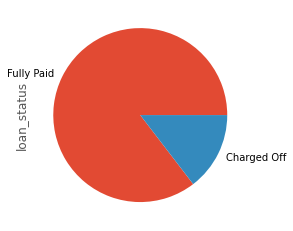

In [18]:
df['loan_status'].value_counts().plot.pie()
plt.show()

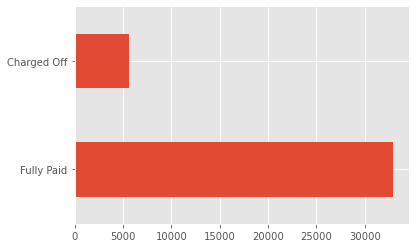

In [19]:
df['loan_status'].value_counts().plot.barh()
plt.show()

In [20]:
df['emp_title'].value_counts()

US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
amneal pharmaceuticals                        1
Net Equity Financial                          1
Kernersville Fire Department                  1
The Keith Corp. (empl by county, now Kei      1
Evergreen Center                              1
Name: emp_title, Length: 28027, dtype: int64

In [21]:
df['emp_title'].describe()

count       36191
unique      28027
top       US Army
freq          131
Name: emp_title, dtype: object

In [22]:
df['loan_amnt'].value_counts()

10000    2809
12000    2248
5000     2028
6000     1886
15000    1838
         ... 
18325       1
9650        1
20450       1
15425       1
22550       1
Name: loan_amnt, Length: 870, dtype: int64

In [23]:
df['loan_amnt'].describe()


count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

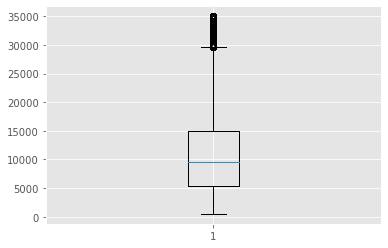

In [24]:
plt.boxplot(df['loan_amnt'])
plt.show()

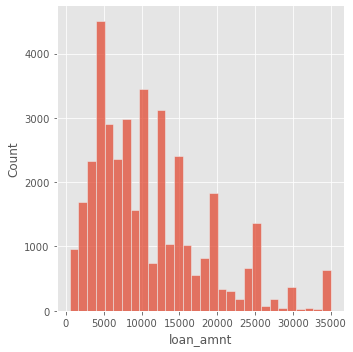

In [25]:
sns.displot(df['loan_amnt'],bins = 30)
plt.show()

In [26]:
df['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [27]:
df['term'].isnull().sum()

0

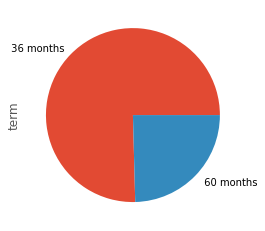

In [28]:
df['term'].value_counts().plot.pie()
plt.show()

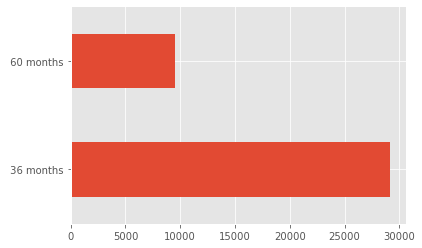

In [29]:
df['term'].value_counts().plot.barh()
plt.show()